Red Wine Quality Prediction
Problem Statement: The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Inayat\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
ds = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
ds

In [3]:
ds.shape

(1599, 12)

In [4]:
ds.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
ds.columns = ds.columns.str.replace(' ', '_')
ds.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
ds.isnull().sum()     #no Missing Values

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
ds.duplicated().sum()

240

In [9]:
#dropping duplicate rows and resetting index
ds=ds.drop_duplicates()
print('Number of rows after removing duplicates=', len(ds))

Number of rows after removing duplicates= 1359


<AxesSubplot:>

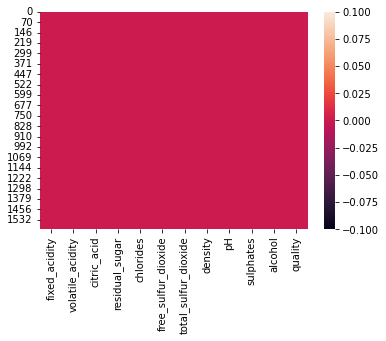

In [10]:
sns.heatmap(ds.isnull())

In [11]:
ds.duplicated().sum()

0

But before going for EDA ,1st distribute target column into 1 and 0 ,as specified in project discription..When value is 7 or above its 1(Good) and else it 0(Bad)

In [12]:
# Creating Our own target variable
ds['quality_new'] = [1 if x >= 7 else 0 for x in ds['quality']]

In [13]:
ds

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_new
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [14]:
# Now lets drop quality columns from the data frame ,other we will get 2 output
ds1=ds.drop('quality',axis=1)


In [15]:
ds1

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_new
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [16]:
ds['quality_new']

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality_new, Length: 1359, dtype: int64

# EDA

In [17]:
ds1

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_new
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


Univariate Analysis

<AxesSubplot:xlabel='fixed_acidity', ylabel='quality_new'>

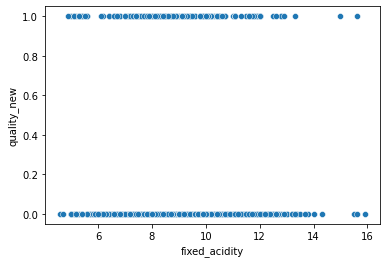

In [18]:
sns.scatterplot(x='fixed_acidity',y='quality_new',data=ds)

Outcome:Fixed acidity is equally distributed in the range of 0 to 13 with the quality_new of 0 and 1 .

<AxesSubplot:xlabel='volatile_acidity', ylabel='quality_new'>

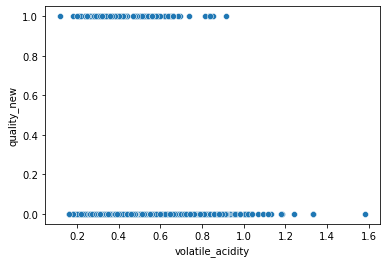

In [19]:
sns.scatterplot(x='volatile_acidity',y='quality_new',data=ds)

Outcome:volatile acidity is equally distributed in the range of 0.0 to 0.9 with the quality_new of 0 and 1 . .

<AxesSubplot:xlabel='citric_acid', ylabel='quality_new'>

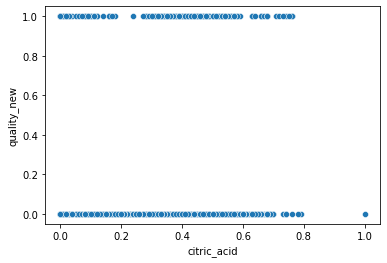

In [20]:
sns.scatterplot(x='citric_acid',y='quality_new',data=ds)

Outcome:We can see the citric acidity is equally distributed in the range of 0.0 to 0.8 with the quality_new of 0 and 1 . 

<AxesSubplot:xlabel='residual_sugar', ylabel='quality_new'>

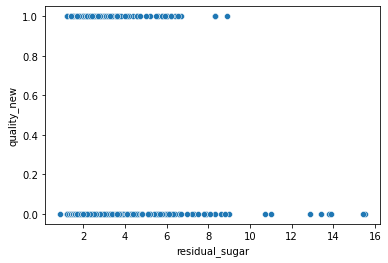

In [21]:
sns.scatterplot(x='residual_sugar',y='quality_new',data=ds)

Outcome:We can see the residual Sugar is equally distributed in the range of 0.0 to 9 with the quality_new of 0 and 1 .

<AxesSubplot:xlabel='chlorides', ylabel='quality_new'>

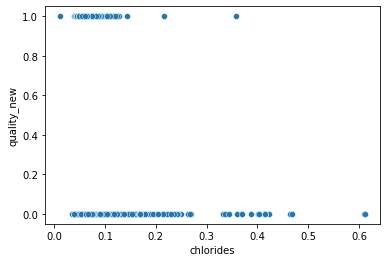

In [22]:
sns.scatterplot(x='chlorides',y='quality_new',data=ds)

Outcome:chlorides is equally distributed in the range of 0.0 to 0.2 with the quality_new of 0 and 1 .

<AxesSubplot:xlabel='free_sulfur_dioxide', ylabel='quality_new'>

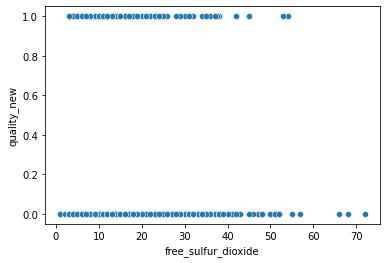

In [23]:
sns.scatterplot(x='free_sulfur_dioxide',y='quality_new',data=ds)

Outcome:free sulfur dioxide is equally distributed in the range of 0 to 35 with the quality_new of 0 and 1 . .

<AxesSubplot:xlabel='total_sulfur_dioxide', ylabel='quality_new'>

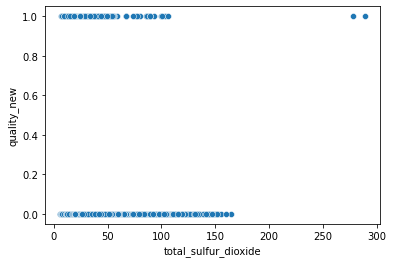

In [24]:
sns.scatterplot(x='total_sulfur_dioxide',y='quality_new',data=ds)

 total sulfur dioxide is equally distributed in the range of 0 to 120 zwith the quality_new of 0 and 1 . .

# Bi variate analysis which are more equally distributed with target column

array([[<AxesSubplot:title={'center':'fixed_acidity'}>,
        <AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'citric_acid'}>],
       [<AxesSubplot:title={'center':'residual_sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide'}>],
       [<AxesSubplot:title={'center':'total_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality_new'}>]], dtype=object)

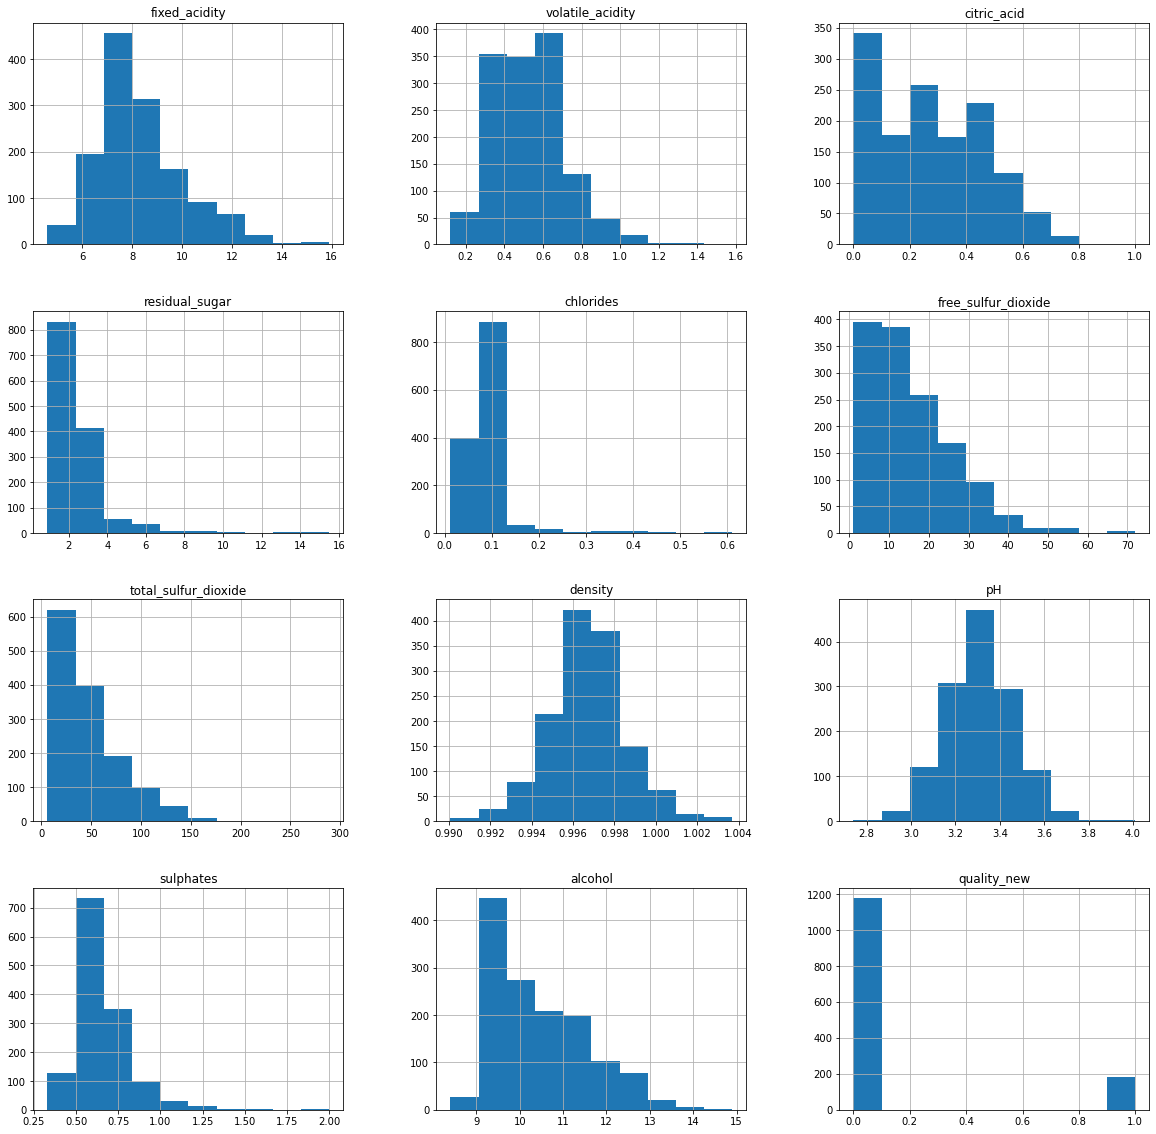

In [25]:
ds1.hist(bins=10, figsize=(20,20))


Outcome:
1.Data are highly skewed

2.Quality_new ,good quaility of wine or 1 is less or imbalanced as compared to 0 or bad quality

3. Density and pH are having normally distributed and are not skewed

# Multivarate 

<AxesSubplot:xlabel='alcohol', ylabel='density'>

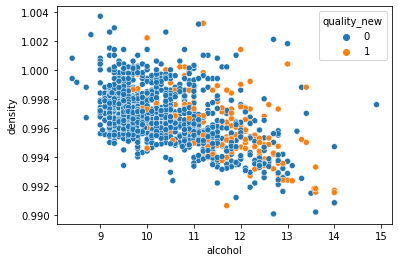

In [26]:
sns.scatterplot(x='alcohol',y='density',hue='quality_new',data=ds1)

 0 is more scattered than 1,the density of water is close to that of water depending on the percent alcohol and here the data is scattered between 9 to 13

<AxesSubplot:xlabel='pH', ylabel='density'>

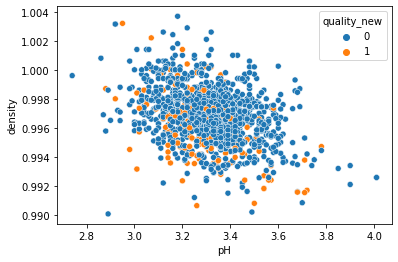

In [27]:
sns.scatterplot(x='pH',y='density',hue='quality_new',data=ds1)

pH :- describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the graph

And we can clearly see that the max data is scattered between 3 to 3.6 for density and pH

<Figure size 1800x2160 with 0 Axes>

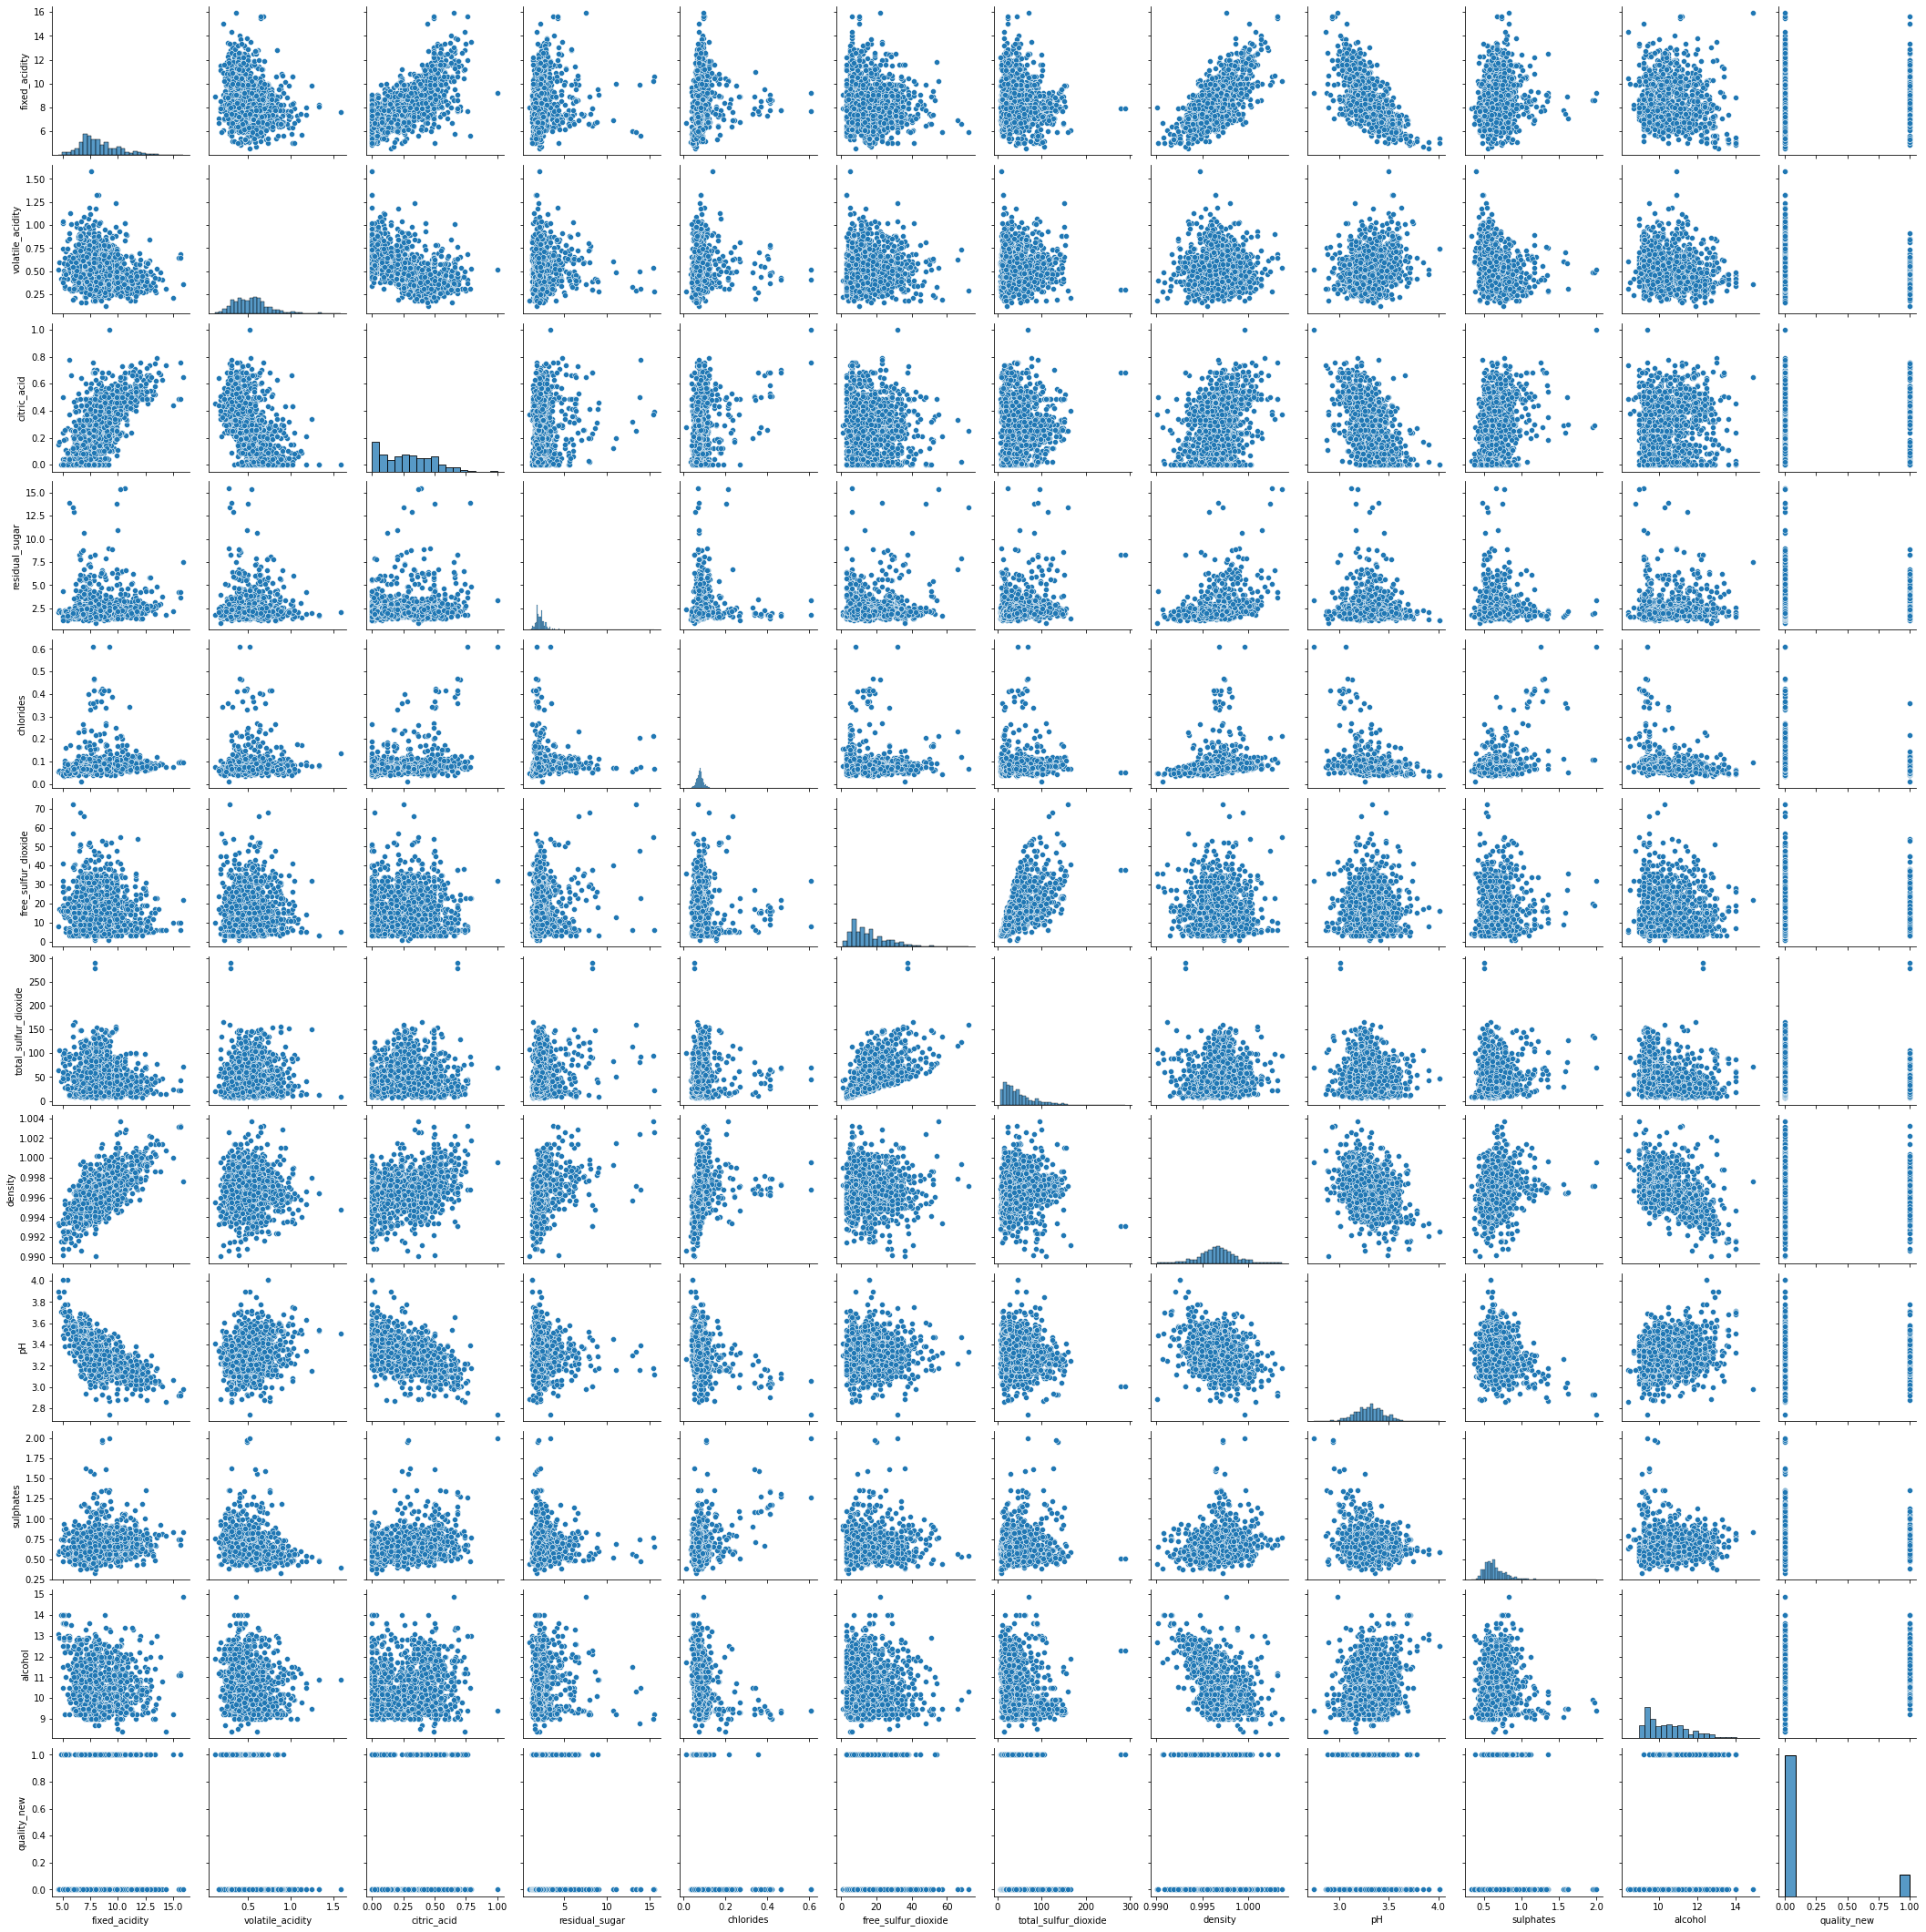

In [28]:
plt.figure(figsize=(25,30))
sns.pairplot(ds1)
plt.show()

[Text(0.5, 1.0, 'HISTOGRAM OF WINE QUALITY'),
 Text(0.5, 0, 'quality'),
 Text(0, 0.5, 'count')]

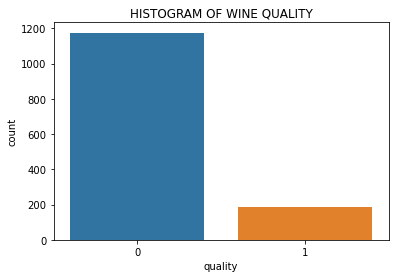

In [29]:
plt = sns.countplot(x='quality_new',data=ds1)
plt.set(title='HISTOGRAM OF WINE QUALITY',xlabel='quality',ylabel='count')

<AxesSubplot:xlabel='quality', ylabel='fixed_acidity'>

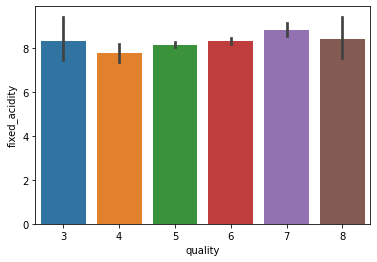

In [30]:
sns.barplot(x='quality',y='fixed_acidity',data=ds)
#fixed_acidity doesnot have impact on quality of wine

<AxesSubplot:xlabel='quality', ylabel='volatile_acidity'>

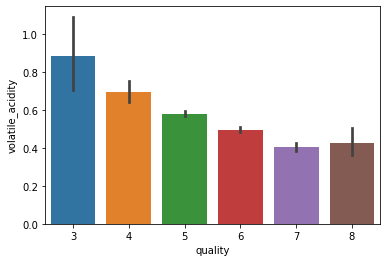

In [31]:
sns.barplot(x='quality',y='volatile_acidity',data=ds)
#Volatile acidity has negative relation with quality.

In [32]:
sns.barplot(x='quality',y='citric_acid',data=ds1)
#citric acid has positive relation with quality.

ValueError: Could not interpret input 'quality'

<AxesSubplot:xlabel='quality', ylabel='residual_sugar'>

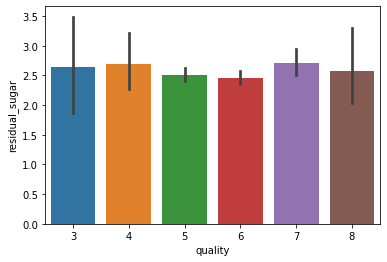

In [33]:
sns.barplot(x='quality',y='residual_sugar',data=ds)
#Residual sugar have no impact on the quality of wine

In [34]:
sns.barplot(x='quality',y='chlorides',data=ds1)
#Increase in chlorides will decrease the quality of the wine.

ValueError: Could not interpret input 'quality'

In [ ]:
sns.barplot(x='quality',y='free_sulfur_dioxide',data=ds)
#free sulphur dioxide has positive relation with the quality.

In [ ]:
sns.barplot(x='quality',y='total_sulfur_dioxide',data=ds1)
#total sulphur dioxide has positive relation with the quality.

In [ ]:
sns.barplot(x='quality',y='density',data=ds1)
#Density has no corelation with quality

In [ ]:
sns.barplot(x='quality',y='pH',data=ds1)
#PH no corealtion with quality

In [ ]:
sns.barplot(x='quality',y='sulphates',data=ds)
#sulphate increases quality of wine

In [ ]:
sns.barplot(x='quality',y='alcohol',data=ds)
#ncrease in alcohol quality will improve.

Now Lets See that counts of each columns

In [ ]:
for i in ds.columns:
        print(ds1[i].value_counts())
        print('*'*100)

In [ ]:
plt = sns.countplot(x='quality_new',data=ds)
plt.set(title='HISTOGRAM OF WINE QUALITY',xlabel='quality',ylabel='count')

<AxesSubplot:>

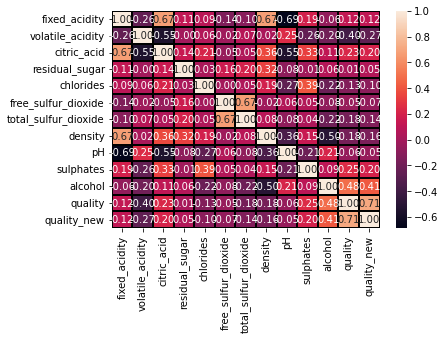

In [35]:
#plt.figure(figsize = (10,10))
sns.heatmap(ds.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

#From above figure we can conclude that

#Alcohol is most positively corelated among the other attributes with the quality.
#volatile acidity is most negatively corelated among the other attributes with the quality.
#residual sugar,free sulfur dioxide,pH have no corelation with the quality.

In [ ]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
ds1.corr()['quality_new'].sort_values(ascending=False).drop(['quality_new']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [ ]:
ds1.corr()

In [ ]:
ds1.corr()['quality_new'].sort_values()

All the datasets are different and have no Multicollinearity

# DESCRIPTIVE STATSTICS

In [ ]:
ds1.describe().T

In [ ]:
plt.figure(figsize = (22,7))
sns.heatmap(ds1.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Outcome of describe() of dataset :-
from the above plotting we are determining mean,standard deviation,minimum,25%,50%,75% percentle and maximum value of each column

Total number rows and column in dataset

Rows :- 1359
columns :- 12

Fixed acidity==(Mean,std,minimum,25%,50%,75% ,Maximum) =8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000

Volatile acidity==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000

Citric Acid==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000

Residual Suger==(Mean,std,minimum,25%,50%,75% ,Maximum)=2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000

Chlorides====(Mean,std,minimum,25%,50%,75% ,Maximum)=0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100

Free Sulfur dioxide==(Mean,std,minimum,25%,50%,75% ,Maximum)=15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.0000

Total Sulfur Dioxide==(Mean,std,minimum,25%,50%,75% ,Maximum)=46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000

Density==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369

pH==(Mean,std,minimum,25%,50%,75% ,Maximum)=3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000

Sulphates==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000

Alcohol==(Mean,std,minimum,25%,50%,75% ,Maximum)=10.432315,1.082065,8.40000,9.5000,10.2000,11.10000,14.90000


In [ ]:
ds1.info()

OUTLIERS CHECKING

In [ ]:
colmlist=ds1.columns.values
ncol=30
nrows=14

In [ ]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= ds1[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

In [ ]:
# to find out outliers in the dataset
ds1.plot(kind='box',subplots=True,figsize=(20,10))

In [ ]:
x.columns

In [ ]:
ds1.skew()

In [ ]:
#Lets plot all using Histogram and see the skewness again
 
#plt.rcParams['figure.figsize']=(20,20)
ds1.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.show()

WE can see only density and pH are little normally distributed rest all are skewed or unbalanced data
fixed acidity,volatile acidity ,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
Lets take some of the data and do some of the plotting of skewness although we can see all skewed columns on above plotting

In [ ]:
sns.distplot(ds1['fixed_acidity'])

In [ ]:
 sns.distplot(ds1['volatile_acidity'])
    

In [ ]:
sns.distplot(ds1['citric_acid'])
    

the data of the column is not normalised ...The building block is out of normalized curve..It a right skewed data..
we can see that the data is not normally distributed

Normal distribution curve of outcome column is irrelevent

In [ ]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore(ds1)) < 3).all()

In [ ]:
#to remove outliers in data set through zscore
z = np.abs(zscore(ds1))
z.shape

In [ ]:
threshold = 3
print(np.where(z>3))

In [ ]:
ds1_new=ds1[(z<3).all(axis=1)]
print(ds1.shape)
print(ds1_new.shape)

In [ ]:
ds1.shape

In [ ]:
ds1_new.shape

In [ ]:
print ("Old DataFrame =",ds1.shape)
print ("New DataFrame =",ds1_new.shape)
print ("Total dropped rows = ",ds1.shape[0] - ds1_new.shape[0])

In [ ]:
#to find % loss in data
loss = (1359-1239)/1359 * 100
print(loss)

In [ ]:
ds1_new

In [ ]:
# Independent column

x=ds1_new.iloc[:,0:-1]
x

In [ ]:
x.shape

In [ ]:
# Target or dependent variable

y=ds1_new.iloc[:,-1]
y.shape

# TRANSFORMING DATA TO REMOVE SKEWNESS

In [ ]:
ds1.skew()

In [ ]:
from sklearn.preprocessing import power_transform
x_new=power_transform(ds1,method='yeo-johnson')

In [ ]:
pd.DataFrame(x_new).skew()

In [ ]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

In [ ]:
x.mean()

In [ ]:
x.std()

In [ ]:
ds1['quality_new'].value_counts()

Balancing the dataset over here,otherwise it will be a baised dataset

In [ ]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [ ]:
x.shape

In [ ]:
y.value_counts()

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y)

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [ ]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [ ]:
vif_cal()

# No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models...


In [ ]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,1239):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=922)

In [ ]:
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

In [ ]:
x_train

In [ ]:
y_test

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=587)

CROSS VALIDATION FOR LOGISTICS REGRESSION,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

In [ ]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb = GradientBoostingClassifier()
RF = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier()

model=[lg,gnb,svc,dtc,knn,RF,gb,ada]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy_score:",m,'is')
    print(confusion_matrix(y_test, predm))
    print(accuracy_score(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

In [ ]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean())
print('cross validation score of logistic regression model = ', cross_val_score(lg,x,y,cv=None).mean())
print('cross validation score of decison tree model = ', cross_val_score(dtc,x,y,cv=None).mean())
print('cross validation score of  KNeighborsClassifier model = ', cross_val_score(knn,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())
print('cross validation score of GaussianNB model = ', cross_val_score(gnb,x,y,cv=None).mean())
print('cross validation score of GradientBoostingClassifier model = ',cross_val_score(gb,x,y,cv=None).mean())
print('cross validation score of AdaBoostingClassifier model = ',cross_val_score(ada,x,y,cv=None).mean())

Hyper parameter tuning

Plotting ROC and compare AUC for all the models used

In [ ]:
display = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(rf,x_test,y_test,ax=display.ax_)
plot_roc_curve(kn,x_test,y_test,ax=display.ax_)
plot_roc_curve(svc,x_test,y_test,ax=display.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=display.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [ ]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

,gnb,svc
disp=plot_roc_curve(lr, x_test, y_test)   
plot_roc_curve(lg, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RF, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gnb, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [ ]:
#parameters of LogisticRegression
parameter= { 'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']}

In [ ]:
gcv = GridSearchCV(LogisticRegression(random_state=587), parameter, verbose=1, cv=10, n_jobs=-1)

In [ ]:
#training the model
gcv.fit(x_train,y_train)

In [ ]:
#finding out which parameter is giving best accuracy
gcv.best_params_

In [ ]:
type(gcv)

In [ ]:
# finding best estimator
gcv.best_estimator_

In [ ]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc =accuracy_score(y_test,pred)
print(acc*100)

ROC AUC Scores

In [ ]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

In [ ]:
#ploting ROC and AUC curve
plot_roc_curve=roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()


In [ ]:


saving the model
import joblib
joblib.dump(final_model,'FinalModel_wine_quality.pkl')